In [1]:
import pandas as pd 

df = pd.read_csv('shopping-data.csv')

In [2]:
# df = df.drop(columns=['CustomerID'])

In [3]:
df.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1,99))
XT = scaler.fit_transform(df.iloc[:,1:])

In [5]:
df['Income'] = XT[:,0]
df['Score'] = XT[:,1]

In [6]:
df
X=df.iloc[:,3:]
X

,Income,Score
0,1.000000,39.0
1,1.000000,81.0
2,1.803279,6.0
3,1.803279,77.0
4,2.606557,40.0
...,...,...
195,85.344262,79.0
196,90.163934,28.0
197,90.163934,74.0
198,99.000000,18.0


In [7]:
from scipy.cluster.hierarchy import dendrogram,linkage 

z1 = linkage(X,method='single',metric='euclidean')
z2 = linkage(X,method='complete',metric='euclidean')
z3 = linkage(X,method='average',metric='euclidean')
z4 = linkage(X,method='ward',metric='euclidean')



Text(0.5, 1.0, 'ward')

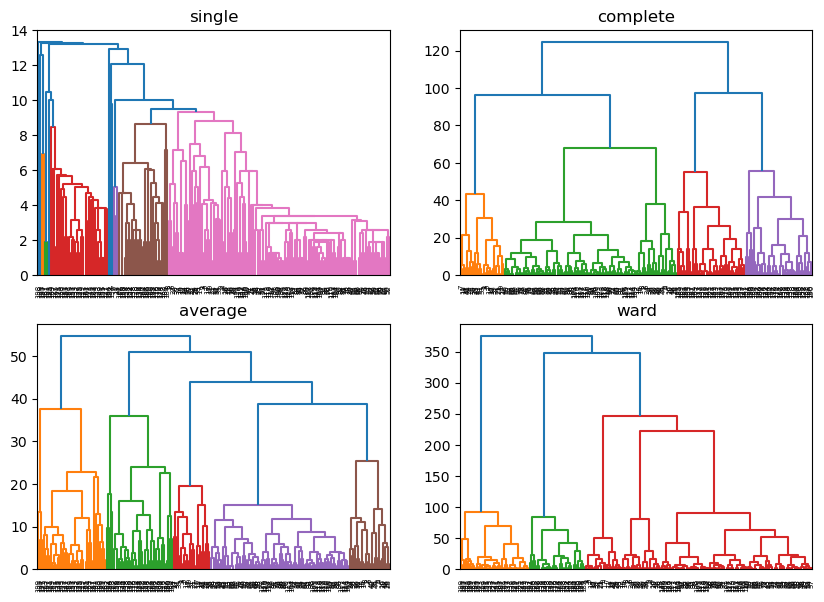

In [8]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 7))
plt.subplot(2,2,1,)
dendrogram(z1)
plt.title('single')

plt.subplot(2,2,2,)
dendrogram(z2)
plt.title('complete')

plt.subplot(2,2,3,)
dendrogram(z3)
plt.title('average')

plt.subplot(2,2,4,)
dendrogram(z4)
plt.title('ward')


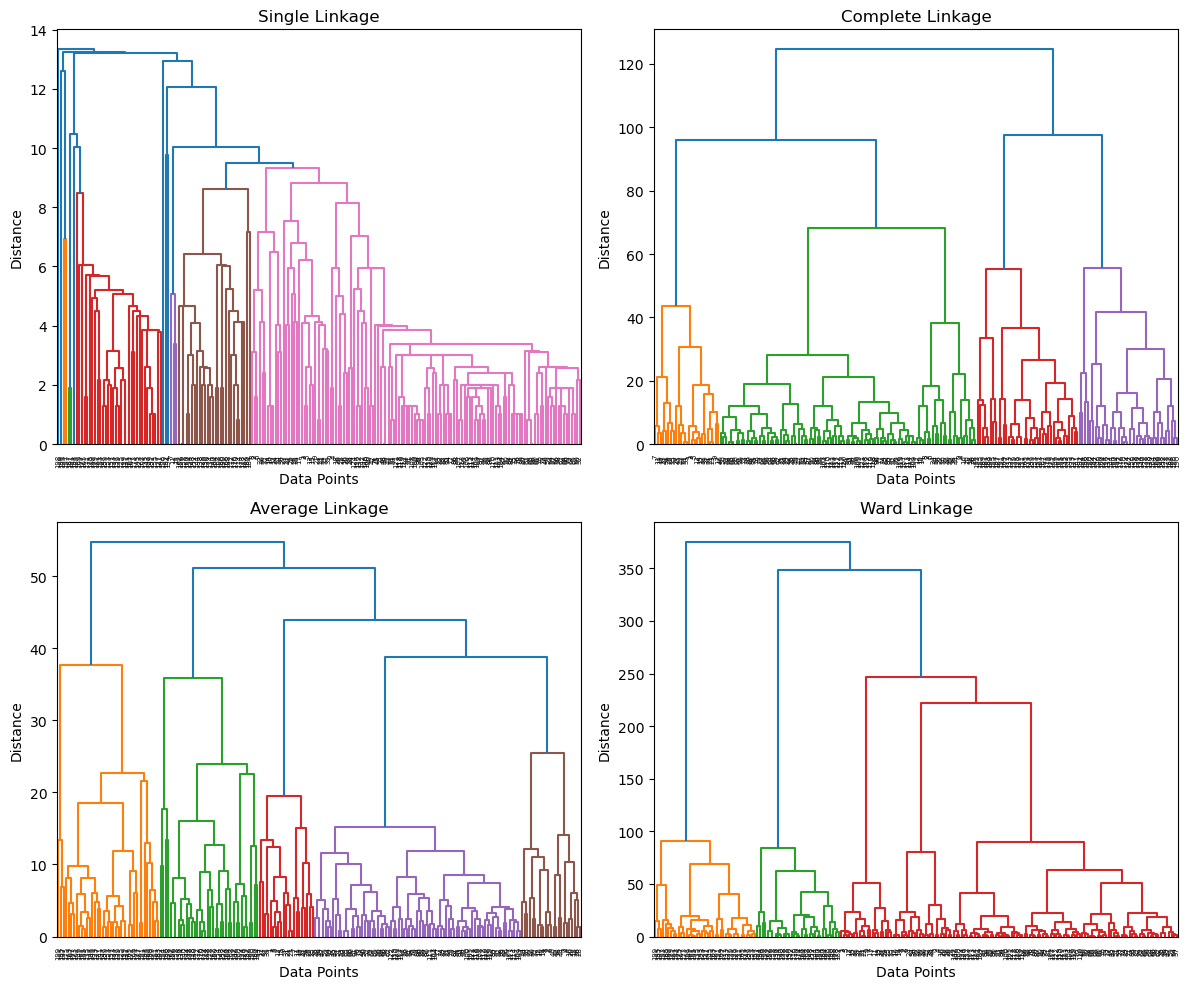

In [9]:
# --- Hierarchical Clustering and Linkage Methods ---
# We calculate the linkage matrix for four different methods:
# 'single': Uses the minimum distance between observations in the two sets.
# 'complete': Uses the maximum distance between observations in the two sets.
# 'average': Uses the average of the distances between all pairs of observations in the two sets.
# 'ward': Minimizes the variance within each cluster (often works well for general-purpose clustering).
# 'euclidean' is used as the distance metric for all methods.

z1 = linkage(X, method='single', metric='euclidean')
z2 = linkage(X, method='complete', metric='euclidean')
z3 = linkage(X, method='average', metric='euclidean')
z4 = linkage(X, method='ward', metric='euclidean')

# --- Plotting the Dendrograms ---
# We create a figure with 2 rows and 2 columns of subplots
# to display each dendrogram side-by-side.
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability

# Subplot 1: Single Linkage
plt.subplot(2, 2, 1)
dendrogram(z1)
plt.title('Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Subplot 2: Complete Linkage
plt.subplot(2, 2, 2)
dendrogram(z2)
plt.title('Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Subplot 3: Average Linkage
plt.subplot(2, 2, 3)
dendrogram(z3)
plt.title('Average Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Subplot 4: Ward Linkage
plt.subplot(2, 2, 4)
dendrogram(z4)
plt.title('Ward Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=5,linkage='ward')
model.fit_predict(X)
print(model.labels_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


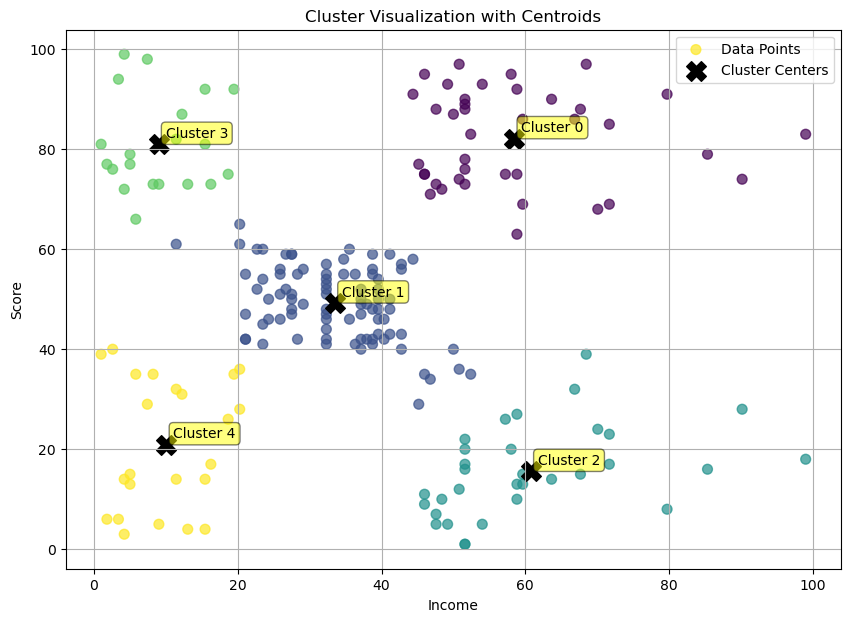

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X1 = X['Income']
X2 = X['Score']

model_labels = model.labels_
unique_labels = np.unique(model_labels)

centroids = []
for label in unique_labels: 
    cluster_points = np.array([X1[model_labels == label], X2[model_labels == label]]).T
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Convert to NumPy array for easy slicing
centroids = np.array(centroids)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(X1, X2, c=model_labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Cluster Centers')
for i,center in enumerate(centroids): 
       plt.annotate(f"Cluster {i}", xy=center, xytext=(5, 5), textcoords='offset points',
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5),
                 fontsize=10)

    
plt.xlabel("Income")
plt.ylabel("Score")
plt.title("Cluster Visualization with Centroids")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
vip_customer = pd.DataFrame()

In [14]:
vip_customer['CustomerID'] = df['CustomerID']
vip_customer['cluster'] = model.labels_ 


In [16]:
vip_customer[ vip_customer['cluster'] == 0 ]

,CustomerID,cluster
123,124,0
125,126,0
127,128,0
129,130,0
131,132,0
133,134,0
135,136,0
137,138,0
139,140,0
141,142,0
